--- Linear Kernel ---
Accuracy:       0.9708
Recall:         0.9483
Precision:      0.9821
Jaccard Score:  0.9322
Error Rate:     0.0292
Confusion Matrix:
[[78  1]
 [ 3 55]]

--- Polynomial Kernel ---
Accuracy:       0.9124
Recall:         0.7931
Precision:      1.0000
Jaccard Score:  0.7931
Error Rate:     0.0876
Confusion Matrix:
[[79  0]
 [12 46]]

--- RBF Kernel ---
Accuracy:       0.9635
Recall:         0.9483
Precision:      0.9649
Jaccard Score:  0.9167
Error Rate:     0.0365
Confusion Matrix:
[[77  2]
 [ 3 55]]

--- Sigmoid Kernel ---
Accuracy:       0.9635
Recall:         0.9483
Precision:      0.9649
Jaccard Score:  0.9167
Error Rate:     0.0365
Confusion Matrix:
[[77  2]
 [ 3 55]]



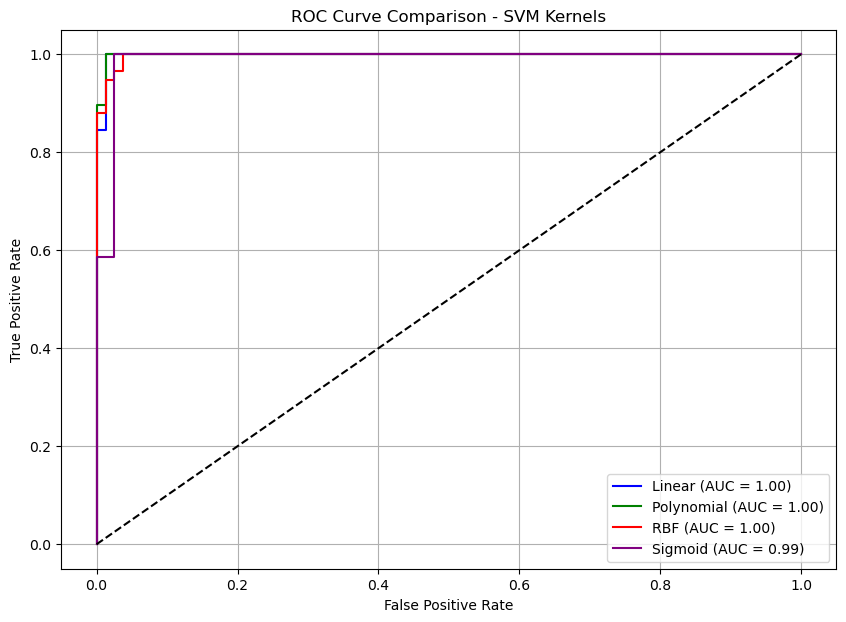

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, jaccard_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

# Load dataset
df = pd.read_csv("samples_cancer.csv")

# Drop ID column
df = df.drop("ID", axis=1)

# Handle non-numeric 'BareNuc' if needed
df = df.replace('?', np.nan).dropna()
df["BareNuc"] = df["BareNuc"].astype(int)

# Features and labels
X = df.drop("Class", axis=1)
y = df["Class"].replace({2: 0, 4: 1})  # 0 = benign, 1 = malignant

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def evaluate_model(model, name, color):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    err = 1 - acc
    cm = confusion_matrix(y_test, y_pred)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"--- {name} Kernel ---")
    print(f"Accuracy:       {acc:.4f}")
    print(f"Recall:         {rec:.4f}")
    print(f"Precision:      {prec:.4f}")
    print(f"Jaccard Score:  {jaccard:.4f}")
    print(f"Error Rate:     {err:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})", color=color)

    return

plt.figure(figsize=(10, 7))

evaluate_model(SVC(kernel='linear', probability=True), "Linear", "blue")
evaluate_model(SVC(kernel='poly', degree=3, probability=True), "Polynomial", "green")
evaluate_model(SVC(kernel='rbf', probability=True), "RBF", "red")
evaluate_model(SVC(kernel='sigmoid', probability=True), "Sigmoid", "purple")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - SVM Kernels")
plt.legend()
plt.grid(True)
plt.show()
